<a href="https://colab.research.google.com/github/kimqkr4/submission/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC20250613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기말고사(20250613)**
학번 :             
성명 :

# **문제 1) ANN Backpropagation**

In [11]:
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

# Target
y = 3 * x1 - 2 * x2 + x3

Epoch 10/100, MSE: 1.1920, MAPE: 304.5244
Epoch 20/100, MSE: 1.1836, MAPE: 304.4806
Epoch 30/100, MSE: 1.1745, MAPE: 304.3345
Epoch 40/100, MSE: 1.1641, MAPE: 304.0253
Epoch 50/100, MSE: 1.1517, MAPE: 303.4814
Epoch 60/100, MSE: 1.1367, MAPE: 302.6201
Epoch 70/100, MSE: 1.1183, MAPE: 301.3343
Epoch 80/100, MSE: 1.0956, MAPE: 299.4881
Epoch 90/100, MSE: 1.0677, MAPE: 296.9188
Epoch 100/100, MSE: 1.0336, MAPE: 293.4314

학습 완료
최종 MSE: 1.0298
최종 MAPE: 293.0236


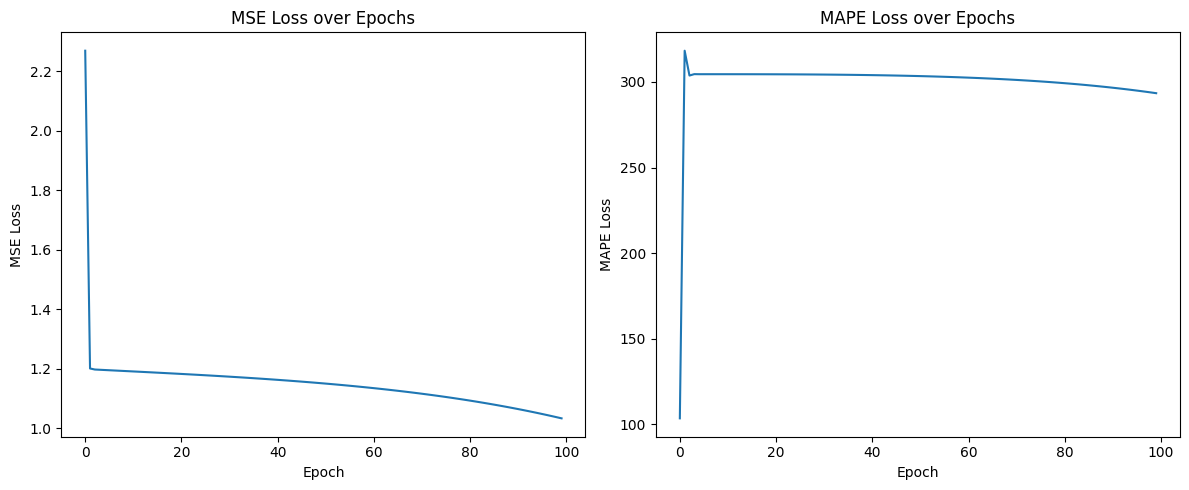

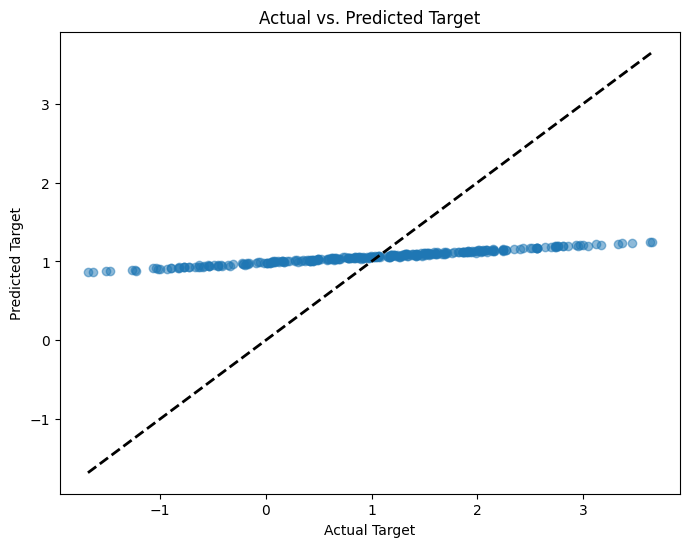

In [12]:
# 1. ANN 모델 클래스 정의
class ANN:
    def __init__(self, input_size, hidden_size, output_size):
        # 가중치와 편향 초기화
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # 순전파 계산
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2  # 출력층은 회귀 문제이므로 활성화 함수 없음

        return self.a2

    def backward(self, X, y, output, learning_rate):
        # 역전파 계산
        output_error = output - y.reshape(-1, 1)
        output_delta = output_error

        hidden_error = output_delta.dot(self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.a1)

        # 가중치 및 편향 업데이트
        self.W2 -= self.a1.T.dot(output_delta) * learning_rate
        self.b2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W1 -= X.T.dot(hidden_delta) * learning_rate
        self.b1 -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

# 2. 시그모이드 활성화 함수는 ANN 클래스 안에 포함되어 있습니다.

# 3. MSE와 MAPE 코스트 함수 정의
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 데이터 준비 (문제 1에서 생성된 x1, x2, x3, y 사용)
X = np.column_stack((x1, x2, x3))
y_true = y

# 모델 초기화
input_size = X.shape[1]
hidden_size = 10  # 은닉층 크기
output_size = 1
ann_model = ANN(input_size, hidden_size, output_size)

# 하이퍼파라미터 설정
learning_rate = 0.001
epochs = 100

# 손실 기록
mse_losses = []
mape_losses = []

# 모델 학습
for epoch in range(epochs):
    # 순전파
    y_pred = ann_model.forward(X)

    # 역전파 및 가중치 업데이트
    ann_model.backward(X, y_true, y_pred, learning_rate)

    # 손실 계산 및 기록
    mse_loss = mean_squared_error(y_true, y_pred.flatten())
    mape_loss = mean_absolute_percentage_error(y_true, y_pred.flatten())
    mse_losses.append(mse_loss)
    mape_losses.append(mape_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, MSE: {mse_loss:.4f}, MAPE: {mape_loss:.4f}')

# 4. 학습 결과 평가 및 시각화
print("\n학습 완료")

# 최종 예측값
final_predictions = ann_model.forward(X).flatten()

# 최종 MSE 및 MAPE
final_mse = mean_squared_error(y_true, final_predictions)
final_mape = mean_absolute_percentage_error(y_true, final_predictions)

print(f"최종 MSE: {final_mse:.4f}")
print(f"최종 MAPE: {final_mape:.4f}")

# 손실 변화 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), mse_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over Epochs")

plt.subplot(1, 2, 2)
plt.plot(range(epochs), mape_losses)
plt.xlabel("Epoch")
plt.ylabel("MAPE Loss")
plt.title("MAPE Loss over Epochs")

plt.tight_layout()
plt.show()

# 실제 값 vs 예측 값 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_true, final_predictions, alpha=0.5)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs. Predicted Target")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2) # y=x 선
plt.show()

# **문제 2) CNN**
- Data
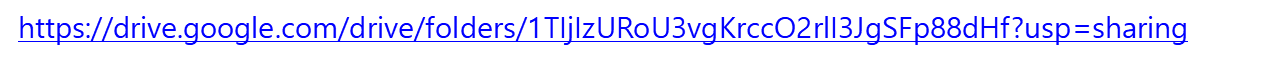

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [16]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_label.npy')

test_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_label.npy')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 100, 100, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,323,654 (12.68 MB)

 Trainable params: 3,322,246 (12.67 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 275ms/step - accuracy: 0.2991 - loss: 6.6906 - val_accuracy: 0.8333 - val_loss: 1.3133
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5939 - loss: 1.0564 - val_accuracy: 0.0000e+00 - val_loss: 5.3662
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6912 - loss: 0.8055 - val_accuracy: 0.1667 - val_loss: 8.6476
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7893 - loss: 0.5399 - val_accuracy: 0.1667 - val_loss: 10.1734
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8293 - loss: 0.4703 - val_accuracy: 0.0278 - val_loss: 6.0204
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8874 - loss: 0.3546 - val_accuracy: 0.0000e+00 - val_loss: 7.2689
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9221 - loss: 0.2286 - val_accuracy: 0.1667 - val_loss: 8.4059
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9459 - loss: 0.1735 - val_accuracy:

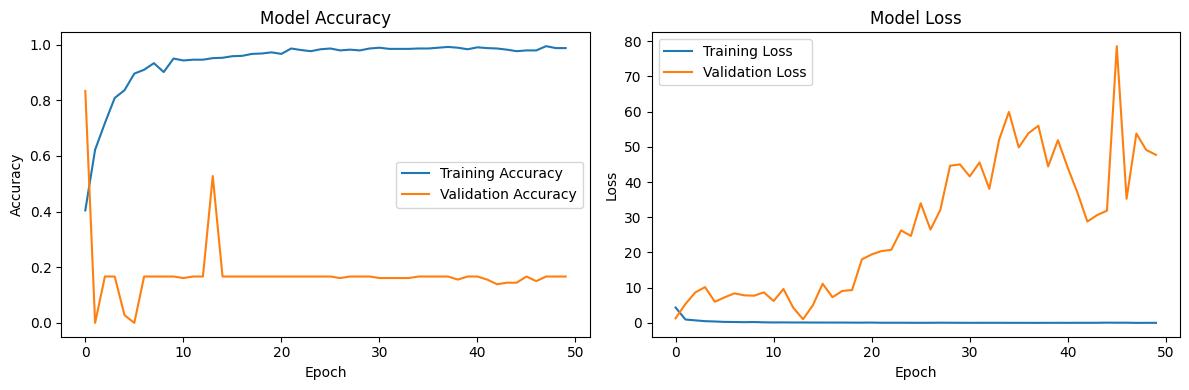

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Correct Predictions: 275/337 (81.60%)


In [17]:
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

if train_x.ndim == 3:
    train_x = np.expand_dims(train_x, axis=-1)
    test_x = np.expand_dims(test_x, axis=-1)
elif train_x.ndim == 5:
    train_x = np.squeeze(train_x, axis=-1)
    test_x = np.squeeze(test_x, axis=-1)

train_y_one_hot = train_y
test_y_one_hot = test_y

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=train_x.shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs = 50
batch_size = 32

history = model.fit(train_x, train_y_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

loss, accuracy = model.evaluate(test_x, test_y_one_hot, verbose=2)
print(f"\nTest accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(test_y_one_hot, axis=1)

correct = np.sum(predicted_classes == actual_classes)
total = len(actual_classes)
print(f"Correct Predictions: {correct}/{total} ({correct / total:.2%})")


# **문제 3) K-means clustering**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

K-means converged after 4 iterations.


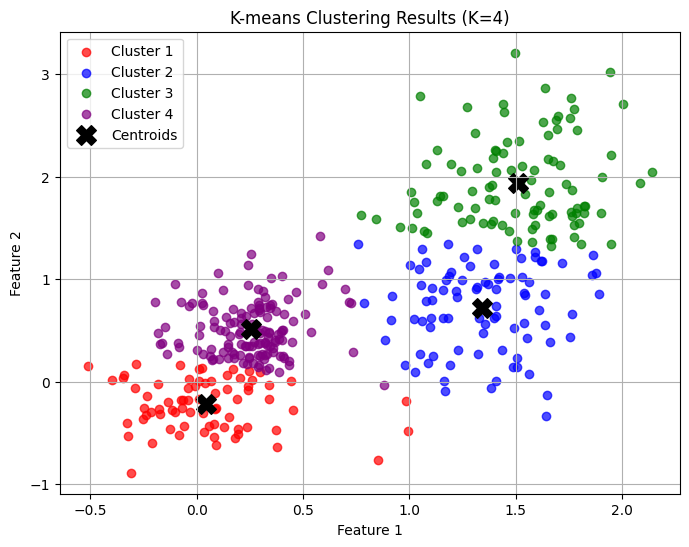

K-means converged after 2 iterations.
K=1, SSE=448.2269
K-means converged after 4 iterations.
K=2, SSE=154.3279
K-means converged after 11 iterations.
K=3, SSE=97.8433
K-means converged after 14 iterations.
K=4, SSE=80.8026
K-means converged after 14 iterations.
K=5, SSE=63.5953
K-means converged after 14 iterations.
K=6, SSE=46.4254
K-means converged after 10 iterations.
K=7, SSE=44.3712
K-means converged after 18 iterations.
K=8, SSE=36.8229
K-means converged after 13 iterations.
K=9, SSE=31.5526
K-means converged after 13 iterations.
K=10, SSE=27.9446


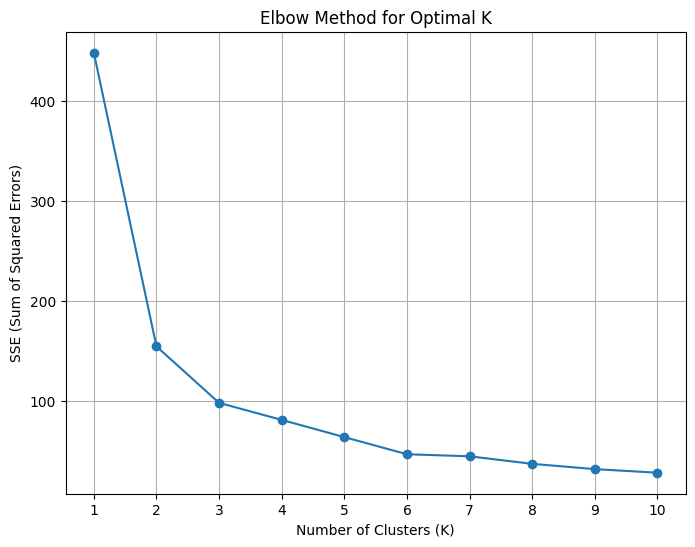

In [14]:
# 1. 데이터 준비 및 병합
# 문제 3에서 생성된 data1, data2, data3, data4 사용
data1_t = data1.T
data2_t = data2.T
data3_t = data3.T
data4_t = data4.T

all_data = np.concatenate((data1_t, data2_t, data3_t, data4_t), axis=0)

# 2. 초기 센트로이드 설정 (4개 데이터 세트의 평균)
initial_centroids = np.array([
    np.mean(data1_t, axis=0),
    np.mean(data2_t, axis=0),
    np.mean(data3_t, axis=0),
    np.mean(data4_t, axis=0)
])

# K 값 설정 (초기 센트로이드 개수에 따라 K=4)
K = initial_centroids.shape[0]
centroids = initial_centroids.copy()

# 3. K-평균 클러스터링 알고리즘 코딩
def kmeans(X, initial_centroids, max_iters=100):
    K = initial_centroids.shape[0]
    centroids = initial_centroids.copy()
    m = X.shape[0] # 데이터 포인트의 개수
    cluster_assignments = np.zeros(m)

    for i in range(max_iters):
        # 각 데이터 포인트를 가장 가까운 센트로이드에 할당
        for j in range(m):
            distances = np.sum((X[j, :] - centroids)**2, axis=1) # 유클리드 거리 제곱
            cluster_assignments[j] = np.argmin(distances)

        # 새로운 센트로이드 계산
        new_centroids = np.zeros(centroids.shape)
        counts = np.zeros(K)
        for k in range(K):
            points_in_cluster = X[cluster_assignments == k]
            if len(points_in_cluster) > 0:
                new_centroids[k, :] = np.mean(points_in_cluster, axis=0)
                counts[k] = len(points_in_cluster)
            else:
                 # 클러스터에 속한 점이 없으면 센트로이드 변경 안 함 (또는 랜덤하게 다시 초기화 가능)
                 new_centroids[k, :] = centroids[k, :]


        # 센트로이드가 수렴했는지 확인
        if np.allclose(centroids, new_centroids):
            print(f"K-means converged after {i+1} iterations.")
            break

        centroids = new_centroids

    return centroids, cluster_assignments

# K-means 실행
final_centroids, assignments = kmeans(all_data, initial_centroids)

# 4. 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple'] # K=4에 맞게 색상 지정

for k in range(K):
    cluster_data = all_data[assignments == k]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[k], label=f'Cluster {k+1}', alpha=0.7)

plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering Results (K=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 5. 엘보우 방법을 사용하여 최적 K 개수 결정 (추가 분석)
# 이 부분은 최적의 K를 결정하기 위한 추가 분석입니다.
# K-means 알고리즘을 다양한 K 값으로 실행하고 각 K에 대한 SSE (Sum of Squared Errors)를 계산합니다.

def calculate_sse(X, centroids, assignments):
    sse = 0
    K = centroids.shape[0]
    for k in range(K):
        cluster_data = X[assignments == k]
        if len(cluster_data) > 0:
            sse += np.sum((cluster_data - centroids[k, :])**2)
    return sse

sse_values = []
# 다양한 K 값 (예: 1부터 10까지)으로 K-means 실행
for k_test in range(1, 11):
    # 랜덤 초기 센트로이드 사용 (엘보우 방법에서는 보통 랜덤 초기화를 여러 번 수행)
    # 여기서는 간단하게 데이터 범위 내에서 랜덤 초기화
    if k_test > all_data.shape[0]:
        break
    random_indices = np.random.choice(all_data.shape[0], size=k_test, replace=False)
    test_initial_centroids = all_data[random_indices]

    test_centroids, test_assignments = kmeans(all_data, test_initial_centroids, max_iters=100)
    sse = calculate_sse(all_data, test_centroids, test_assignments)
    sse_values.append(sse)
    print(f"K={k_test}, SSE={sse:.4f}") # 진행 상황 확인

# SSE 값 시각화 (엘보우 플롯)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sse_values) + 1), sse_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method for Optimal K")
plt.xticks(range(1, len(sse_values) + 1))
plt.grid(True)
plt.show()

# 엘보우 플롯에서 SSE 값이 급격히 줄어들다가 완만해지는 지점 (팔꿈치처럼 꺾이는 지점)을 최적의 K로 결정합니다.
# 이 데이터의 생성 방식을 고려하면 K=4에서 꺾이는 것을 예상할 수 있습니다.

K는 2